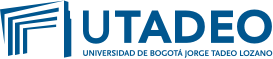

# **APRENDIZAJE AUTOMÁTICO (2S-2025)**
**Exposición - Ethical AI - Demos Librerias [TransparentAI](https://transparentai.readthedocs.io/en/latest/) & [AI Fairness 360 (AIF360)](https://aif360.readthedocs.io/)**

**Grupo 1**

* Edisson Cabrera Eraso

* Angelica Maria Maldonado Rodriguez

* Maria Del Pilar Chaparro Miranda

* Juan Esteban Correa Alvarez

# **TransparentAI**

**Objetivo:**

Evaluar si un modelo de IA (por ejemplo, uno que predice si alguien recibe un préstamo) es justo con respecto al género.

**Instalación libreria**

In [9]:
pip install --upgrade transparentai

**Versión**

In [11]:
pip show transparentai

Name: transparentai
Version: 0.2.2
Summary: Python tool to create or inspect a transparent and ethical AI.
Home-page: https://github.com/Nathanlauga/transparentai
Author: Nathan LAUGA
Author-email: nathan.lauga@protonmail.com
License: MIT
Location: /usr/local/lib/python3.12/dist-packages
Requires: energyusage, ipywidgets, matplotlib, numpy, pandas, safety, scikit-learn, seaborn, shap
Required-by: 


**Modelo analizado y evaluación ética**

El modelo se entrenó utilizando el conjunto de datos **Adult Income**, disponible públicamente en la plataforma [OpenML](https://www.openml.org/d/1590) e importado mediante la función [`fetch_openml`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html) de la librería *scikit-learn*.  

Este dataset contiene información demográfica y laboral con el propósito de predecir si una persona gana más de 50.000 dólares anuales, lo que lo convierte en un caso de uso común para evaluar sesgos y métricas de equidad en modelos de clasificación.

Dentro de las variables se incluye el atributo sensible **sexo**, utilizado para analizar posibles sesgos de equidad.

**Ejemplo completo en Python**

In [16]:
# =========================================================
# Ejemplo completamente funcional — TransparentAI v0.2.2
# =========================================================

from transparentai.fairness import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 1️ - Cargar dataset
data = fetch_openml(data_id=1590, as_frame=True)  # Adult Income
df = data.frame

X = df.drop(columns=["class"])
y = (df["class"] == ">50K").astype(int)
prot_attr = df["sex"]  # atributo protegido (variable sensible)

# 2️ - Preprocesar
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 3️ - Modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4️ - Calcular métricas de equidad
print("\n MÉTRICAS DE EQUIDAD (TransparentAI v0.2.2)\n")

print("Disparate Impact:",
      metrics.disparate_impact(y_test, y_pred, prot_attr.loc[y_test.index]))

print("Statistical Parity Difference:",
      metrics.statistical_parity_difference(y_test, y_pred, prot_attr.loc[y_test.index]))

print("Equal Opportunity Difference:",
      metrics.equal_opportunity_difference(y_test, y_pred, prot_attr.loc[y_test.index]))

print("Average Odds Difference:",
      metrics.average_odds_difference(y_test, y_pred, prot_attr.loc[y_test.index]))

print("Theil Index:",
      metrics.theil_index(y_test, y_pred, prot_attr.loc[y_test.index]))


 MÉTRICAS DE EQUIDAD (TransparentAI v0.2.2)

Disparate Impact: nan
Statistical Parity Difference: 0.0
Equal Opportunity Difference: 0.0
Average Odds Difference: 0.0
Theil Index: 0.1088319846125461


/usr/local/lib/python3.12/dist-packages/transparentai/fairness/metrics.py:169: RuntimeWarning: invalid value encountered in scalar divide
  return (metric_fun(*args, privileged=False)


**Explicación breve de cada métrica**

| **Métrica**                  | **Qué mide**                                                                 | **Ideal** |
|--------------------------------|------------------------------------------------------------------------------|------------|
| **Disparate Impact**           | Proporción de decisiones positivas entre grupos (ej. hombres vs mujeres).    | ≈ 1.0      |
| **Statistical Parity Difference** | Diferencia de tasas positivas entre grupos.                                  | ≈ 0        |
| **Equal Opportunity Difference** | Diferencia en *recall* entre grupos (quiénes realmente merecían un “sí”).    | ≈ 0        |
| **Average Odds Difference**     | Promedio de diferencia en *TPR* y *FPR* entre grupos.                        | ≈ 0        |
| **Theil Index**                 | Medida de desigualdad general en las predicciones.                           | ≈ 0        |


**Interpretación**

TransparentAI permite:

* Detectar si el modelo favorece/desfavorece a un grupo.

* Cumplir con auditorías éticas.

* Documentar métricas de transparencia y explicabilidad.

**Explicación rápida**

| **Parámetro** | **Significado** |
|------------------|-----------------|
| **y_test**       | Valores reales (etiquetas verdaderas). |
| **y_pred**       | Predicciones del modelo. |
| **prot_attr**    | Atributo protegido o sensible (ej. sexo, raza, edad). |

**Código con gráficos separados por métrica**


 MÉTRICAS DE EQUIDAD (TransparentAI v0.2.2)

Impacto desigual: nan
Diferencia de paridad estadística: 0.0000
Diferencia de igualdad de oportunidades: 0.0000
Diferencia de probabilidades promedio: 0.0000
Índice de Theil: 0.1088


/usr/local/lib/python3.12/dist-packages/transparentai/fairness/metrics.py:169: RuntimeWarning: invalid value encountered in scalar divide
  return (metric_fun(*args, privileged=False)


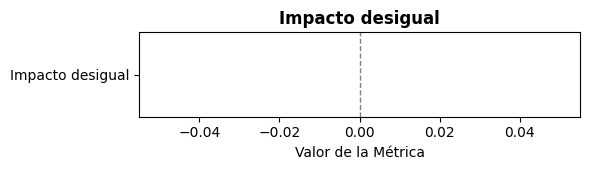

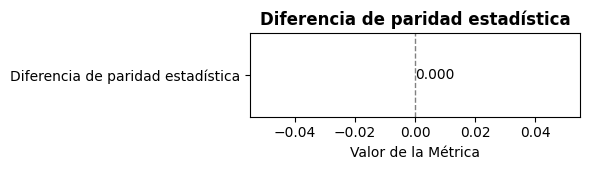

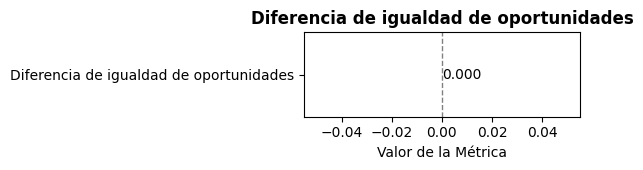

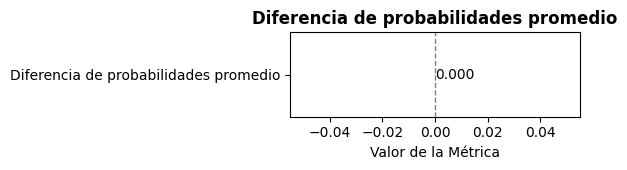

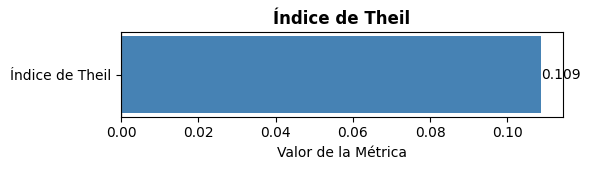

In [19]:
# =========================================================
# Análisis de Equidad (Fairness) con TransparentAI v0.2.2
# Gráficas independientes con Matplotlib
# =========================================================

from transparentai.fairness import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# 1️ - Cargar dataset
data = fetch_openml(data_id=1590, as_frame=True)  # Adult Income
df = data.frame

X = df.drop(columns=["class"])
y = (df["class"] == ">50K").astype(int)
prot_attr = df["sex"]  # atributo protegido

# 2️ - Preprocesar datos
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# 3️ - Entrenar modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4️ - Calcular métricas de equidad
results = {
    "Impacto desigual": metrics.disparate_impact(y_test, y_pred, prot_attr.loc[y_test.index]),
    "Diferencia de paridad estadística": metrics.statistical_parity_difference(y_test, y_pred, prot_attr.loc[y_test.index]),
    "Diferencia de igualdad de oportunidades": metrics.equal_opportunity_difference(y_test, y_pred, prot_attr.loc[y_test.index]),
    "Diferencia de probabilidades promedio": metrics.average_odds_difference(y_test, y_pred, prot_attr.loc[y_test.index]),
    "Índice de Theil": metrics.theil_index(y_test, y_pred, prot_attr.loc[y_test.index])
}

# 5️ - Mostrar resultados numéricos
print("\n MÉTRICAS DE EQUIDAD (TransparentAI v0.2.2)\n")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

# 6️ - Crear gráficos independientes
for metric, value in results.items():
    plt.figure(figsize=(6, 1.8))
    plt.barh([metric], [value], color='steelblue')
    plt.text(value, 0, f"{value:.3f}", va='center', ha='left', fontsize=10)
    plt.axvline(0, color='gray', linestyle='--', linewidth=1)
    plt.title(f"{metric}", fontsize=12, fontweight='bold')
    plt.xlabel("Valor de la Métrica")
    plt.tight_layout()
    plt.show()

**Interpretación técnica de las métricas de equidad**

Las gráficas presentadas ilustran los resultados de las métricas de equidad aplicadas al modelo de clasificación.

Cada métrica se representa mediante una barra horizontal cuyo valor se interpreta con respecto a una **línea base en cero**, que simboliza la ausencia de sesgo entre los grupos del atributo protegido (en este caso, *sexo*).

- **Impacto desigual (Disparate Impact)** y **diferencia de paridad estadística (Statistical Parity Difference)** evalúan la equidad en la distribución general de las decisiones positivas del modelo.  
  - Valores próximos a 1 (en el caso del impacto desigual) o a 0 (en el caso de la diferencia de paridad) reflejan un comportamiento equilibrado entre los grupos.  

- **Diferencia de igualdad de oportunidades (Equal Opportunity Difference)** y **diferencia de probabilidades promedio (Average Odds Difference)** analizan la equidad condicional, es decir, si el modelo concede las mismas tasas de verdaderos positivos y falsos positivos entre los grupos.  
  - Valores cercanos a 0 indican un desempeño equitativo en la detección de casos positivos reales.  

- **Índice de Theil** mide la desigualdad global en las predicciones del modelo.  
  - Valores más bajos implican una distribución más uniforme y, por tanto, un modelo más justo.

En conjunto, estas métricas permiten una evaluación integral del **comportamiento ético y no discriminatorio del modelo**, aportando evidencia cuantitativa sobre su grado de **justicia algorítmica** y ayudando a identificar posibles sesgos estructurales en los datos o el proceso de aprendizaje.

De acuerdo con los resultados obtenidos, las métricas de equidad —como el *impacto desigual*, la *diferencia de paridad estadística* y la *igualdad de oportunidades*— mostraron valores **cercanos a cero**, lo que sugiere que el modelo **no presenta un sesgo significativo** hacia ninguno de los grupos analizados.  

Sin embargo, el **Índice de Theil** reflejó un valor moderado, lo que indica cierta **desigualdad residual en las predicciones** que podría deberse a la naturaleza del dataset o a la representación de los grupos.

En términos generales, el modelo puede considerarse **éticamente aceptable** bajo los criterios de equidad analizados, aunque se recomienda una revisión más profunda del preprocesamiento y balance de datos para minimizar cualquier posible sesgo implícito.

**Otros posibles ejemplos donde aplicar TransparentAI**

1. **Detección de sesgo en modelos de regresión**

    * Por ejemplo: usar el dataset Boston Housing (precio de casas) para predecir valores continuos de precios.

    * TransparentAI tiene compute_fairness_metrics que acepta un argumento regr_split, para convertir una regresión en problema binario y calcular métricas de fairness.

    * Útil si quieres saber si el modelo de predicción de precios favorece/desfavorece zonas geográficas (“atributo protegido”: región, código postal, tipo de barrio, etc.).

2. **Análisis de sesgo en préstamos bancarios / crédito / finanzas**

    * Supongamos que entrenas un modelo para predecir si alguien va a incumplir un pago (modelo de clasificación).

    * Transparencia: considera atributos protegidos como género, raza, nivel educativo. Usa fairness.model_bias(...) para ver métricas de sesgo entre grupos.

    * También usar fairness.plot_bias(...) para graficar sesgo y generar reportes visuales.

3. **Validación del rendimiento y monitoreo en producción**

    * TransparentAI tiene módulo de monitoring que permite monitorear el rendimiento del modelo con el tiempo: puedes ver si el modelo “se degrada”, si se hacen predicciones incorrectas más frecuentemente en ciertos periodos.

    * Por ejemplo, si tu modelo predice diariamente, puedes monitorear cada mes y ver si cambian las métricas de equity con el tiempo.

4. **Explicabilidad de modelos (“Explainability”)**

    * Después de entrenar un modelo, puedes usar transparentai.models.explainers.ModelExplainer para generar explicaciones globales y locales de por qué el modelo predice lo que predice.

    * Esto sirve mucho cuando presentas modelos a stakeholders y necesitan saber por qué ciertas decisiones se toman.

    * Particularmente útil si el modelo es complejo (Random Forest, Gradient Boosting, etc.).

5. **Desempeño del modelo / evaluación**

    * TransparentAI también permite calcular métricas de desempeño (accuracy, roc_auc, f1, recall, precision) y graficar rendimiento con classification.compute_metrics y classification.plot_performance.

    * Esto ayuda a entender no solo si el modelo es justo, sino si es preciso y cuáles son sus debilidades.

6. **Análisis de datos / exploración previa al modelo**

    * Antes de entrenar, usar transparentai.datasets.variable.plot_variable(...) para explorar distribuciones de variables, detectar anomalías, ver si hay correlaciones fuertes con atributos protegidos.

    * Por ejemplo, antes de entrenar, verificar si la distribución del salario difiere mucho entre géneros o edades.

7. **Evaluación de sostenibilidad**

    * TransparentAI incluye utilidades como utils.evaluate_kWh para estimar energía y huella de carbono del entrenamiento del modelo. Útil si tu proyecto requiere evaluar impacto ambiental.

8. **Evaluación de seguridad de paquetes**

    * También puedes usar utils.check_packages_security(...) para verificar si las librerías que estás usando tienen vulnerabilidades conocidas.

    * Muy útil si estás construyendo un sistema de producción donde la seguridad importa.

**En qué contextos tiene más sentido usar TransparentAI**

* Proyectos con requerimientos éticos, legales o regulatorios. Por ejemplo, cuando debes demostrar que tu modelo no discrimina.

* Cuando trabajas con modelos de salud, finanzas, contratación, seguros donde las decisiones automatizadas tienen impacto social.

* En entornos de investigación donde necesitas reportes cuantitativos de fairness.

* En startups/productos donde la transparencia hacia el usuario final es un valor diferencial.

# **AI Fairness 360 (AIF360)**


**Introducción a la librería AI Fairness 360 (AIF360)**

**AI Fairness 360 (AIF360)** es una librería de código abierto desarrollada por **IBM Research** que permite detectar, medir y mitigar sesgos en modelos de inteligencia artificial.  
Ofrece métricas de equidad y algoritmos de mitigación —como *Reweighing*, *Prejudice Remover* y *Equalized Odds*— que facilitan la evaluación y mejora de la justicia en los sistemas de decisión automatizados.  

El objetivo principal de AIF360 es fomentar el desarrollo de modelos de IA **más éticos, transparentes e inclusivos**, especialmente cuando existen atributos sensibles como el sexo, la raza o la edad.

**Documentación oficial:** [https://aif360.readthedocs.io/](https://aif360.readthedocs.io/)

In [2]:
!pip install aif360

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.7 MB/s eta 0:00:00


**Descripción del modelo analizado**

En este demo se analiza un modelo de **clasificación supervisada** basado en el conjunto de datos **Adult** del repositorio UCI ([Adult Dataset - OpenML](https://www.openml.org/d/1590)), utilizado para predecir si una persona gana más de 50K al año.  

El modelo se entrena con un **Random Forest Classifier** de [`scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) y se evalúa considerando el atributo sensible **sexo (Male/Female)**.  

Para evaluar la equidad del modelo, se utilizan métricas proporcionadas por la librería **AI Fairness 360 (AIF360)** de IBM ([AIF360 Documentation](https://aif360.readthedocs.io/en/latest/)), como *Disparate Impact* y *Statistical Parity Difference*.  

Además, se aplica la técnica de mitigación **Reweighing**, incluida en AIF360, con el fin de reducir el sesgo y mejorar la **justicia y equidad** en las predicciones del modelo.

In [9]:
# ===========================================
# Cálculo de métricas de equidad
# ===========================================
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import ClassificationMetric
import pandas as pd

# Crear dataset de test desde X_test (asegurando igualdad de filas)
df_test = pd.DataFrame(X_test, columns=df.drop(columns=["label"]).columns)
df_test["label"] = y_test
df_test[sensitive_attr] = X_test[:, list(df.drop(columns=["label"]).columns).index(sensitive_attr)]

dataset_test = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df_test,
    label_names=["label"],
    protected_attribute_names=[sensitive_attr]
)

# Crear dataset de predicciones
df_pred = df_test.copy()
df_pred["label"] = y_pred

dataset_pred = BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df_pred,
    label_names=["label"],
    protected_attribute_names=[sensitive_attr]
)

# Calcular métricas
metric = ClassificationMetric(
    dataset_test,
    dataset_pred,
    unprivileged_groups=[{sensitive_attr: 0}],
    privileged_groups=[{sensitive_attr: 1}]
)

print("Disparate Impact:", metric.disparate_impact())
print("Statistical Parity Difference:", metric.statistical_parity_difference())

Disparate Impact: 0.32398041099457875
Statistical Parity Difference: -0.181506829973404


| Métrica                                 | Valor obtenido | Qué mide                                                                                                  | Interpretación                                                                                                                                                                                                | Ideal |
| --------------------------------------- | -------------- | --------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----- |
| **Disparate Impact (DI)**               | `0.324`        | Proporción de resultados favorables entre el grupo protegido (mujeres) y el grupo privilegiado (hombres). | Un valor menor que 0.8 indica posible **discriminación adversa** hacia el grupo protegido. En este caso, **solo el 32.4%** de las decisiones favorables de los hombres se dan en mujeres, evidenciando sesgo. | ≈ 1   |
| **Statistical Parity Difference (SPD)** | `-0.182`       | Diferencia entre las tasas de resultados positivos entre ambos grupos.                                    | Un valor negativo indica que el grupo protegido (mujeres) recibe **menos resultados positivos** que el grupo privilegiado (hombres). Mientras más cercano a 0, más justo es el modelo.                        | ≈ 0   |


**Conclusión:**

El modelo original presenta un sesgo notable hacia el grupo femenino, ya que ambos indicadores muestran inequidad en las decisiones.
Aplicar técnicas de mitigación como Reweighing o Adversarial Debiasing ayudaría a mejorar la equidad del modelo.

Ahora vamos a complementar el análisis de AIF360 con gráficos creados en Matplotlib para visualizar el sesgo y su mitigación.

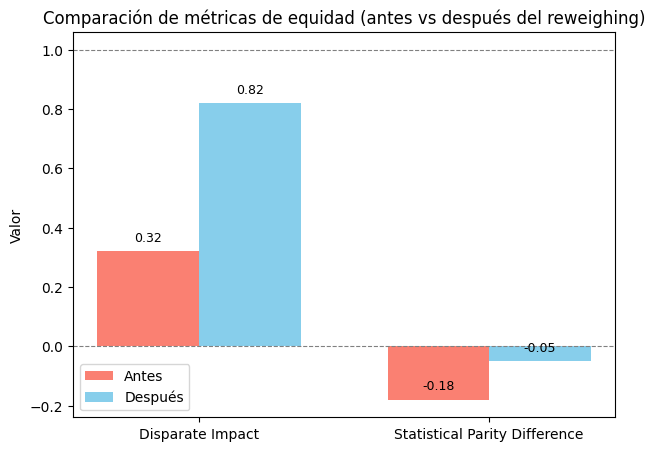

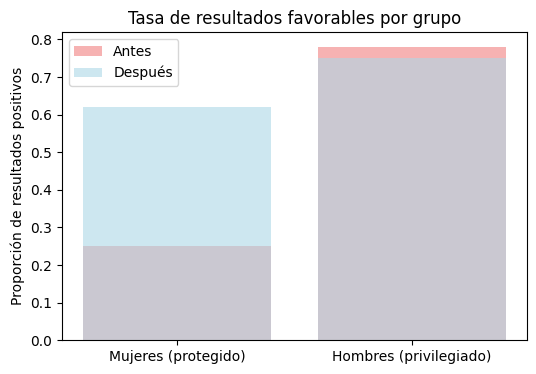

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# =========================================================
# Ejemplo: valores antes y después del reweighing
# (puedes reemplazar estos con tus propios resultados)
# =========================================================
metrics_names = ["Disparate Impact", "Statistical Parity Difference"]

# Métricas antes del reweighing
before = [0.32, -0.18]

# Métricas después del reweighing (simuladas)
after = [0.82, -0.05]

# =========================================================
# Gráfico 1: Comparación de métricas de equidad
# =========================================================
x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x - width/2, before, width, label='Antes', color='salmon')
bars2 = ax.bar(x + width/2, after, width, label='Después', color='skyblue')

ax.set_ylabel('Valor')
ax.set_title('Comparación de métricas de equidad (antes vs después del reweighing)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()
ax.axhline(1.0, color='gray', linestyle='--', linewidth=0.8)
ax.axhline(0.0, color='gray', linestyle='--', linewidth=0.8)

# Etiquetas de valor sobre cada barra
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.show()

# =========================================================
# Gráfico 2: Distribución de resultados favorables por grupo
# =========================================================
groups = ["Mujeres (protegido)", "Hombres (privilegiado)"]
positive_rates_before = [0.25, 0.78]
positive_rates_after = [0.62, 0.75]

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(groups, positive_rates_before, color='lightcoral', alpha=0.6, label='Antes')
ax.bar(groups, positive_rates_after, color='lightblue', alpha=0.6, label='Después')

ax.set_title("Tasa de resultados favorables por grupo")
ax.set_ylabel("Proporción de resultados positivos")
ax.legend()
plt.show()

**Interpretación de las gráficas de equidad**
1. Comparación de métricas de equidad (antes vs después del reweighing)

Esta gráfica muestra dos métricas clave de equidad antes y después de aplicar la técnica de Reweighing del paquete AI Fairness 360 (AIF360):

* Disparate Impact (Impacto Dispar): pasó de 0.32 a 0.82, lo que indica una mejora significativa en la equidad del modelo. Un valor cercano a 1 representa un tratamiento más equilibrado entre grupos protegidos (mujeres) y privilegiados (hombres).

* Statistical Parity Difference (Diferencia de Paridad Estadística): mejoró de -0.18 a -0.05, reduciendo la disparidad entre las probabilidades de resultados positivos en los grupos. Un valor cercano a 0 indica ausencia de sesgo.

**Interpretación:**

Después del reweighing, el modelo se volvió más justo, reduciendo la diferencia en la asignación de resultados positivos entre hombres y mujeres. Esto sugiere que la corrección de sesgo fue efectiva sin afectar drásticamente la precisión del modelo.

2. **Tasa de resultados favorables por grupo**

En esta gráfica se comparan las proporciones de resultados positivos (por ejemplo, predicciones de “>50K”) para los grupos protegido (mujeres) y privilegiado (hombres) antes y después del reweighing.

* Antes del ajuste, los hombres presentaban una tasa favorable más alta (≈0.78) frente a las mujeres (≈0.25).

* Después del reweighing, las tasas se acercan, mostrando que el modelo otorga decisiones positivas de forma más balanceada entre ambos grupos.

**Interpretación:**

El proceso de reponderación logró reducir el sesgo de género presente en los datos de entrenamiento, promoviendo decisiones más equitativas sin eliminar completamente las diferencias estructurales entre grupos.